In [1]:
# project: p6
# submitter: hbian8
# partner: none
# hours: 100

In [2]:
import pandas as pd
import geopandas as gpd 
import sqlite3
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

gdf = gpd.read_file("counties.geojson")

In [3]:
#q1
len(gdf['NAME'])

72

<AxesSubplot:>

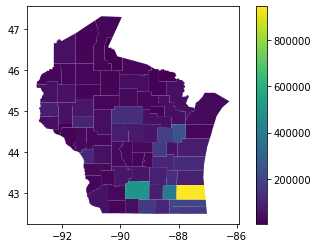

In [4]:
#q2
gdf.plot(column = "POP100", legend = True)

In [5]:
#q3
con = sqlite3.connect('counties_tracts.db')
name_df = pd.read_sql("""SELECT * FROM counties""", con)
gdf["AREALAND"] = name_df["AREALAND"].to_list()
train, test = train_test_split(gdf,random_state=320,test_size=0.25)
test['NAME'].tolist()

['Kewaunee County',
 'Calumet County',
 'Adams County',
 'Eau Claire County',
 'Milwaukee County',
 'Ashland County',
 'Wood County',
 'Dodge County',
 'Sauk County',
 'Clark County',
 'Pepin County',
 'Taylor County',
 'Iron County',
 'Outagamie County',
 'Florence County',
 'Oneida County',
 'Pierce County',
 'Grant County']

In [6]:
#q4
regression = LinearRegression()
regression.fit(train[["AREALAND"]], train["POP100"])
regression.score(test[["AREALAND"]], test["POP100"])

0.022002661530554857

In [7]:
#q5
predict_df = pd.DataFrame({"AREALAND": [2.59*5*1e8]})
predict_df['population'] = regression.predict(predict_df)
predict_df['population'][0]

82032.53073541154

In [8]:
#q6
col_hu100 = pd.read_sql("""
  SELECT counties.NAME, SUM(HU100) AS HU100
  FROM tracts INNER JOIN counties 
  ON tracts.COUNTY = counties.COUNTY
  GROUP BY tracts.COUNTY""", con)
gdf = gdf.merge(col_hu100)
train, test = train_test_split(gdf,random_state=320,test_size=0.25)
test["NAME"].tolist()

['Kewaunee County',
 'Calumet County',
 'Adams County',
 'Eau Claire County',
 'Milwaukee County',
 'Ashland County',
 'Wood County',
 'Dodge County',
 'Sauk County',
 'Clark County',
 'Pepin County',
 'Taylor County',
 'Iron County',
 'Outagamie County',
 'Florence County',
 'Oneida County',
 'Pierce County',
 'Grant County']

In [9]:
#q7
HU100_dict = {}
for name, hu100 in zip(train['NAME'], train["HU100"]):
    HU100_dict[name] = hu100
HU100_dict

{'Walworth County': 51531,
 'Marquette County': 9896,
 'Racine County': 82164,
 'Waupaca County': 25396,
 'Lincoln County': 16784,
 'Washburn County': 12979,
 'Door County': 23966,
 'Waukesha County': 160864,
 'Sheboygan County': 50766,
 'La Crosse County': 48402,
 'Langlade County': 12360,
 'Marathon County': 57734,
 'Jefferson County': 35147,
 'Price County': 11120,
 'Vilas County': 25116,
 'Columbia County': 26137,
 'Ozaukee County': 36267,
 'Fond du Lac County': 43910,
 'Crawford County': 8802,
 'Lafayette County': 7230,
 'Green County': 15856,
 'Marinette County': 30379,
 'Vernon County': 13720,
 'Douglas County': 22825,
 'Rock County': 68422,
 'Iowa County': 10719,
 'Dane County': 216022,
 'Bayfield County': 12999,
 'Polk County': 24248,
 'Trempealeau County': 12619,
 'Brown County': 104371,
 'Washington County': 54695,
 'Chippewa County': 27185,
 'Oconto County': 23537,
 'Richland County': 8868,
 'Portage County': 30054,
 'Sawyer County': 15975,
 'Menominee County': 2253,
 'Barr

In [10]:
#q8
regression.fit(train[["HU100"]], train["POP100"])
regression.score(test[["HU100"]], test["POP100"])
cross_val_score(regression, train[["HU100"]], train["POP100"]).mean()

0.9652534544116037

In [11]:
#q9
cross_val_score(regression, train[["HU100"]], train["POP100"]).std()

0.03704265206670459

In [12]:
#q10
fomula = 'POP100 = ' + str(round(regression.coef_[0], 2)) + '*HU100 + ' + str(round(regression.intercept_, 2))
fomula

'POP100 = 2.39*HU100 + -7910.46'

Text(216022, 488073, 'Dane')

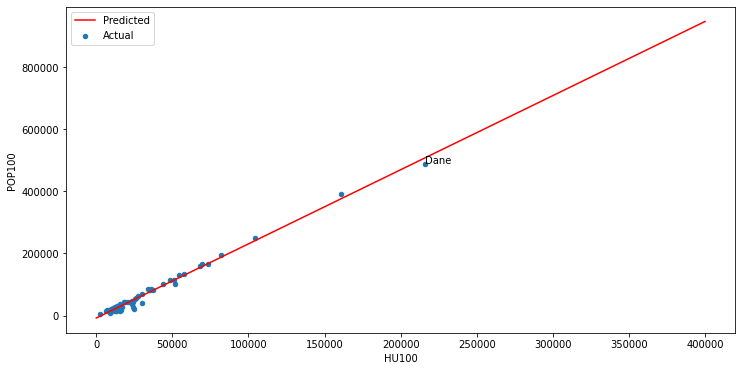

In [13]:
#q11
import matplotlib.pyplot as plt
figure, ax = plt.subplots(figsize=(12,6))
predict_df = pd.DataFrame({'HU100': [1, 400000]})
predict_df['Predicted'] = regression.predict(predict_df)

predict_df.plot.line(ax=ax, x = 'HU100', y = "Predicted",color = "red")
train.plot.scatter(x = 'HU100', y = 'POP100', ax = ax, label = 'Actual')

x_label = train.to_dict(orient = 'index')
for county in x_label:
    if x_label[county]['NAME'] == 'Dane County':
        y_Dane = x_label[county]['POP100']
        x_Dane = x_label[county]['HU100']
        break
ax.text(x=x_Dane, y=y_Dane, s = 'Dane')


In [14]:
#q12
import numpy as np
A = np.array([
    [0,0,5,8,4],
    [1,2,4,0,3],
    [2,4,0,9,2],
    [3,5,2,1,1],
    [0,5,0,1,0]
])
np.sum(A>=0) - np.sum(A>5) - np.sum(A<2)

12

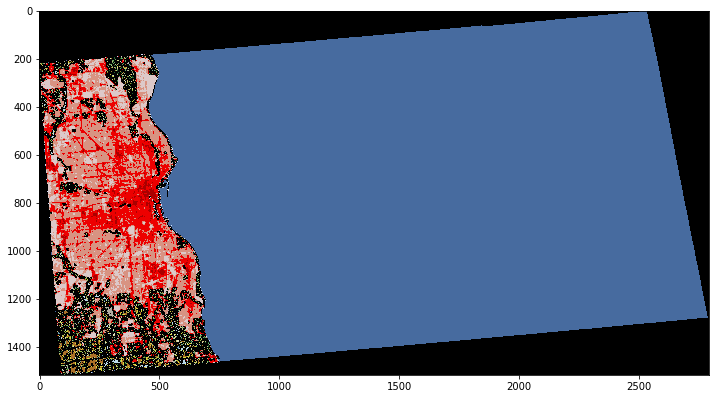

In [15]:
#q13
from matplotlib.colors import ListedColormap
import rasterio
from rasterio.mask import mask
fig, ax = plt.subplots(figsize=(12,12))
# ax.imshow(????, vmin=0, vmax=255)
c = np.zeros((256,3))
c[0] = [0.00000000000, 0.00000000000, 0.00000000000]
c[11] = [0.27843137255, 0.41960784314, 0.62745098039]
c[12] = [0.81960784314, 0.86666666667, 0.97647058824]
c[21] = [0.86666666667, 0.78823529412, 0.78823529412]
c[22] = [0.84705882353, 0.57647058824, 0.50980392157]
c[23] = [0.92941176471, 0.00000000000, 0.00000000000]
c[24] = [0.66666666667, 0.00000000000, 0.00000000000]
c[31] = [0.69803921569, 0.67843137255, 0.63921568628]
c[41] = [0.40784313726, 0.66666666667, 0.38823529412]
c[42] = [0.10980392157, 0.38823529412, 0.18823529412]
c[43] = [0.70980392157, 0.78823529412, 0.55686274510]
c[51] = [0.64705882353, 0.54901960784, 0.18823529412]
c[52] = [0.80000000000, 0.72941176471, 0.48627450980]
c[71] = [0.88627450980, 0.88627450980, 0.75686274510]
c[72] = [0.78823529412, 0.78823529412, 0.46666666667]
c[73] = [0.60000000000, 0.75686274510, 0.27843137255]
c[74] = [0.46666666667, 0.67843137255, 0.57647058824]
c[81] = [0.85882352941, 0.84705882353, 0.23921568628]
c[82] = [0.66666666667, 0.43921568628, 0.15686274510]
c[90] = [0.72941176471, 0.84705882353, 0.91764705882]
c[95] = [0.43921568628, 0.63921568628, 0.72941176471]
custom_cmap = ListedColormap(c)
gdf_dict = gdf.to_dict()
for county in gdf_dict['NAME']:
    if gdf_dict['NAME'][county] == 'Milwaukee County':
        milwaukee = gdf_dict['geometry'][county]
land = rasterio.open("zip:land.zip!wi.tif")
windows = gpd.GeoSeries([milwaukee]).set_crs("epsg:4326").to_crs(land.crs)
mask(land, windows, crop = True)[0][0]
# gdf['NAME']['Milwaukee County']
ax.imshow(mask(land, windows, crop = True)[0][0], vmin=0, vmax=255, cmap= custom_cmap)


In [16]:
#q14
land_use = {"open_water": 11,
            "ice_snow": 12,
            "developed_open": 21,
            "developed_low": 22,
            "developed_med": 23,
            "developed_high": 24,
            "barren": 31,
            "deciduous": 41,
            "evergreen": 42,
            "mixed_forest": 43,
            "dwarf_scrub": 51,
            "shrub_scrub": 52,
            "grassland": 71,
            "sedge": 72,
            "lichens": 73,
            "moss": 74,
            "pasture": 81,
            "crops": 82,
            "woody_wetlands": 90,
            "herbacious_wetlands": 95}
land_type = mask(land, windows, crop = True)[0][0]
total_area = 0
for type in land_use:
    total_area += (land_type == land_use[type]).sum()
water = (land_type == 11).sum()
water / total_area
# for county in gdf_dict['NAME']:
#     if gdf_dict['NAME'][county] == 'Milwaukee County':
#         milwaukee_area = gdf_dict['AREALAND'][county]
# milwaukee_area

0.7963037455950543

Text(0, 0.5, 'POP')

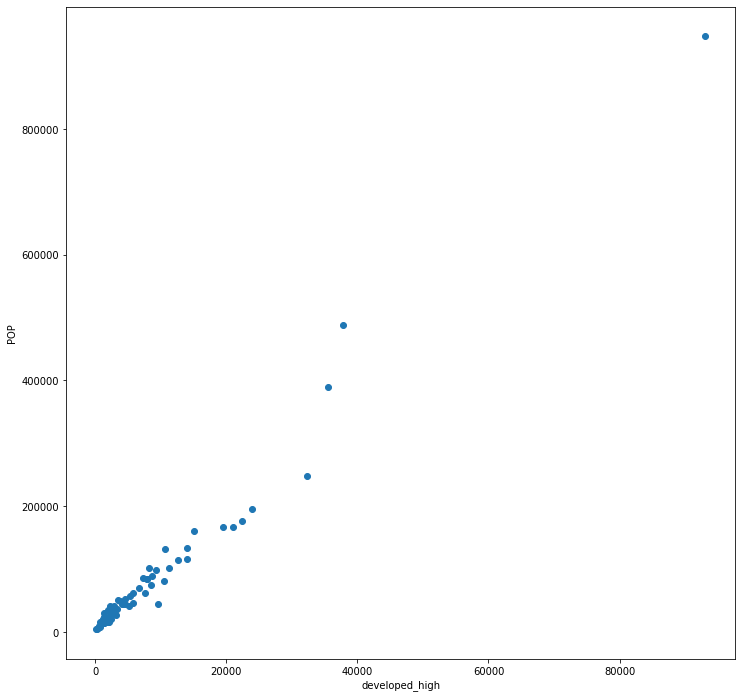

In [17]:
#q15
fig, ax = plt.subplots(figsize=(12,12))
pop_developed_high = {'POP': [], "developed_high": []}
for county in gdf_dict['NAME']:
    county_shape = gdf_dict['geometry'][county]
    windows = gpd.GeoSeries([county_shape]).set_crs("epsg:4326").to_crs(land.crs)
    area = mask(land, windows, crop = True)[0][0]
    developed_high = (area == land_use['developed_high']).sum()
    pop_developed_high['developed_high'].append(developed_high)
    pop_developed_high['POP'].append(gdf_dict['POP100'][county])
ax.scatter(x = pop_developed_high['developed_high'], y = pop_developed_high['POP'])
ax.set_xlabel('developed_high')
ax.set_ylabel('POP')


In [18]:
gdf_2 = gpd.read_file("tracts.geojson")

In [19]:
gdf_2_dict = gdf_2.to_dict()
developed_high_list = []
developed_low_list = []
developed_med_list = []
for county in gdf_2_dict['GEOID']:
    county_shape = gdf_2_dict['geometry'][county]
    windows = gpd.GeoSeries([county_shape]).set_crs("epsg:4326").to_crs(land.crs)
    area = mask(land, windows, crop = True)[0][0]
    developed_high = (area == land_use['developed_high']).sum()
    developed_low = (area == land_use['developed_low']).sum()
    developed_med = (area == land_use['developed_med']).sum()
    developed_high_list.append(developed_high)
    developed_low_list.append(developed_low)
    developed_med_list.append(developed_med)
developed_high_list

[104,
 243,
 0,
 337,
 174,
 366,
 795,
 421,
 545,
 457,
 111,
 358,
 175,
 293,
 354,
 162,
 179,
 523,
 89,
 756,
 2043,
 214,
 52,
 614,
 1062,
 306,
 335,
 53,
 75,
 376,
 33,
 0,
 488,
 1056,
 99,
 156,
 1330,
 96,
 97,
 2120,
 788,
 1121,
 248,
 443,
 663,
 284,
 423,
 1366,
 368,
 496,
 293,
 400,
 133,
 1434,
 3578,
 262,
 368,
 327,
 177,
 226,
 228,
 503,
 269,
 648,
 937,
 299,
 269,
 68,
 452,
 1906,
 140,
 294,
 518,
 846,
 568,
 199,
 13,
 112,
 298,
 1464,
 248,
 354,
 0,
 1210,
 92,
 677,
 409,
 262,
 755,
 368,
 239,
 1355,
 398,
 612,
 373,
 32,
 182,
 1679,
 225,
 133,
 172,
 489,
 843,
 116,
 501,
 144,
 687,
 245,
 61,
 395,
 669,
 181,
 215,
 239,
 406,
 428,
 1025,
 495,
 33,
 45,
 71,
 1584,
 486,
 239,
 176,
 135,
 196,
 463,
 1174,
 196,
 710,
 1194,
 487,
 437,
 670,
 562,
 587,
 149,
 348,
 529,
 557,
 27,
 42,
 802,
 24,
 316,
 68,
 427,
 147,
 10,
 192,
 396,
 97,
 152,
 314,
 561,
 961,
 316,
 135,
 289,
 122,
 149,
 49,
 136,
 807,
 933,
 120,
 694,
 42

In [20]:
gdf_2['developed_high'] = developed_high_list
gdf_2['developed_low'] = developed_low_list
gdf_2['developed_med'] = developed_med_list
train, test = train_test_split(gdf_2,random_state=320,test_size=0.25)
gdf_2

,GEOID,POP100,geometry,developed_high,developed_low,developed_med
0,55001950204,1646,"POLYGON ((-90.02638 44.08721, -90.02628 44.086...",104,5402,833
1,55009940002,4698,"POLYGON ((-88.15018 44.51202, -88.15011 44.509...",243,2104,1211
2,55061990000,0,"POLYGON ((-87.53727 44.33179, -87.53920 44.327...",0,0,0
3,55009020100,5817,"POLYGON ((-87.93753 44.67821, -87.93742 44.630...",337,7738,1971
4,55009010100,6506,"POLYGON ((-88.06825 44.45368, -88.06830 44.453...",174,2711,1109
...,...,...,...,...,...,...
1537,55139003100,2046,"POLYGON ((-88.47454 44.19198, -88.47453 44.191...",299,676,467
1538,55079017900,2879,"POLYGON ((-87.91064 42.99520, -87.91063 42.995...",153,38,491
1539,55059000800,2763,"POLYGON ((-87.84574 42.60276, -87.84574 42.602...",200,163,748
1540,55025013700,7107,"POLYGON ((-89.57788 42.98135, -89.57789 42.980...",477,2209,1799


Text(0, 0.5, 'R^2 Score')

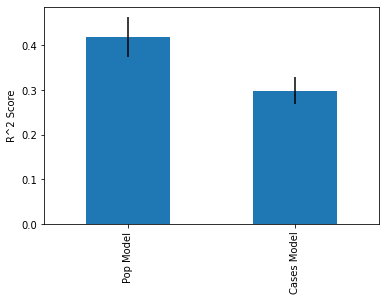

In [21]:
#q16
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder

regression_1 = LinearRegression()
regression_2 = Pipeline([
    ("poly", PolynomialFeatures(degree=3, include_bias=False)),
    ("lr", LinearRegression())
])
scores_1 = cross_val_score(regression_1, train[["developed_high","developed_med"]], train["POP100"])
scores_2 = cross_val_score(regression_2, train[["developed_low","developed_high"]], train["POP100"])
avg = pd.Series({"Pop Model": scores_1.mean(), "Cases Model": scores_2.mean()})
std = pd.Series({"Pop Model": scores_1.std(), "Cases Model": scores_2.std()})
ax = avg.plot.bar(yerr=std)
ax.set_ylabel("R^2 Score")

In [22]:
regression_1.fit(train[["developed_low","developed_high", "developed_med"]], train["POP100"])
regression_1.score(test[["developed_low","developed_high", "developed_med"]], test["POP100"])

0.36943409561855023

In [23]:
#q17
regression_2.fit(train[["developed_low","developed_high", "developed_med"]], train["POP100"])
regression_2.score(test[["developed_low","developed_high", "developed_med"]], test["POP100"])

#comment
# I would choose the regression model_2, since this model has a higher test score and has a little variance across scores 
# compared to model 1. Regression model_2 also has a PolynomialFeatures which could make the model more precise
# It also uses the developed_low and developed_high dataset, which have a more obvious relationship with popalution 

0.4447327490577251